In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array([1,1,6,13,13,14,14,14,15,15,16,18,18,18,19]),
                  columns=['a'])




In [ ]:
q=0.25
#upper 1-q = 0.985
#lower   q = 0.015
max=df.quantile(1-q)
min=df.quantile(q)

print('min : %f' % min)
print('max : %f' % max)

In [ ]:
#print(df)
# Computing IQR
Q1 = df['a'].quantile(0.25)
print('Q1 :',Q1)
Q3 = df['a'].quantile(0.75)
print('Q3 : ',Q3)
IQR = Q3 - Q1
print('IQR : ',IQR)

lower = Q1 - 1.5 * IQR
print('lower :',lower)

upper= Q3 + 1.5 * IQR
print('upper : ',upper)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= a <= (@Q3 + 1.5 * @IQR)')

filtered


In [ ]:
Q1 =np.percentile(df.a, 25)  # Q1
print('Q1 :',Q1)

Q2=np.percentile(df.a, 50)  # median
0.5

Q3=np.percentile(df.a, 75)  # Q3
print('Q3 : ',Q3)

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('p2-arbres-fr.csv', sep=';')
df.dropna(subset=['libelle_francais','espece','domanialite','genre'],inplace=True)


In [38]:
def remove_outliers(df, column):
    '''IQR
    Cette fonction calcule l'IQR-range interquartile
    Parameters
    ----------
    df : dataframe 
    column : colonne
        Supprime les valeurs aberrantes selon l'IQR.
    Returns
    -------
    df
        df (True/False) avec les valeurs qui sont dans le IQR
    '''
    # Calcul Q1, Q2 et IQR
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3 - Q1
    #outliers limits
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    # mask
    mask = (df[column] >= lower) & (df[column] <= upper)
    return mask

In [41]:
def remove_outliers2col(df, column1, column2):
    df_init=df
    df_sva=pd.DataFrame()
    # Calcule de l'IQR par genre
    for index, row in pd.DataFrame(df_init[column1].unique()).iterrows():
        df=df_init[df_init[column1]==row[0]]
        print (df.shape)
        #filter
        df=df[remove_outliers(df, column2)]
        pd.concat([df_sva , df])
    return df_sva

In [42]:
print("Nombre d'enregistrement initial                     : %s \nnombre de colonnes : %s " % df.shape)
#hauteur
df=remove_outliers2col(df,'genre','hauteur_m')
print("Nombre d'enregistrement après IQR                   : %s \nnombre de colonnes : %s " % df.shape)


Nombre d'enregistrement initial                     : 197252 
nombre de colonnes : 18 
(25207, 18)
(1995, 18)
(18389, 18)
(53, 18)
(42506, 18)
(11797, 18)
(6796, 18)
(1926, 18)
(4201, 18)
(21305, 18)
(3866, 18)
(627, 18)
(699, 18)
(1130, 18)
(146, 18)
(497, 18)
(1128, 18)
(4843, 18)
(119, 18)
(517, 18)
(903, 18)
(1413, 18)
(339, 18)
(1736, 18)
(3862, 18)
(2249, 18)
(1054, 18)
(1019, 18)
(2305, 18)
(5981, 18)
(488, 18)
(1390, 18)
(928, 18)
(15, 18)
(395, 18)
(1121, 18)
(3314, 18)
(1212, 18)
(147, 18)
(675, 18)
(997, 18)
(3450, 18)
(452, 18)
(48, 18)
(309, 18)
(339, 18)
(668, 18)
(45, 18)
(309, 18)
(1067, 18)
(590, 18)
(352, 18)
(68, 18)
(86, 18)
(203, 18)
(56, 18)
(28, 18)
(52, 18)
(177, 18)
(952, 18)
(239, 18)
(62, 18)
(438, 18)
(6, 18)
(74, 18)
(76, 18)
(64, 18)
(3471, 18)
(108, 18)
(197, 18)
(347, 18)
(63, 18)
(52, 18)
(44, 18)
(12, 18)
(43, 18)
(26, 18)
(142, 18)
(36, 18)
(5, 18)
(239, 18)
(132, 18)
(32, 18)
(525, 18)
(194, 18)
(58, 18)
(6, 18)
(64, 18)
(2, 18)
(77, 18)
(49, 18)
(28

In [28]:
df.isnull().sum()

id                     195077
type_emplacement       195077
domanialite            195077
arrondissement         195077
complement_addresse    195077
numero                 195077
lieu                   195077
id_emplacement         195077
libelle_francais       195077
genre                  195077
espece                 195077
variete                195077
circonference_cm       195077
hauteur_m              195077
stade_developpement    195077
remarquable            195077
geo_point_2d_a         195077
geo_point_2d_b         195077
dtype: int64

ValueError: min() arg is an empty sequence

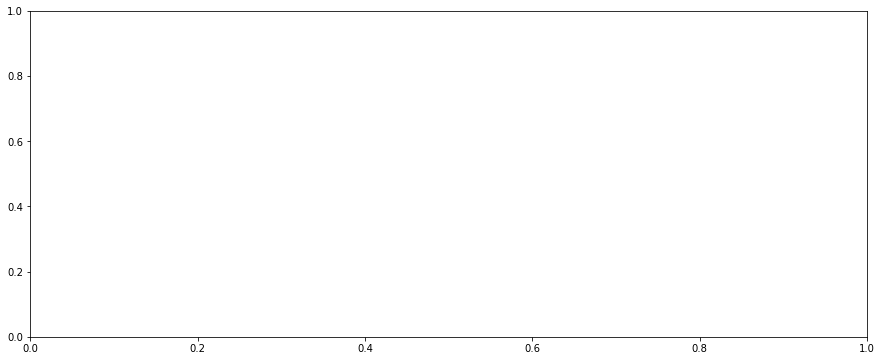

In [27]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
fig=sns.boxplot(y= 'hauteur_m', x= 'genre' , data = df,order = df["genre"].value_counts().iloc[:20].index)
plt.title("IQR genre arbre", size=17)
ax.set( xlabel="Genre d'arbres",ylabel="Hauteur des arbres (m)")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)